In [1]:
# No warnings
import warnings
warnings.filterwarnings('ignore') # Filter out warnings

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

pd.set_option('display.max_columns', 100) # Print 100 Pandas columns

import matplotlib.pyplot as plt
import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

# # visualization
# import seaborn as sns
# %matplotlib inline

# # machine learning
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC, LinearSVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
# from sklearn.linear_model import Perceptron
# from sklearn.linear_model import SGDClassifier #stochastic gradient descent
# from sklearn.tree import DecisionTreeClassifier

# #import xgboost as xgb

# # Plot styling
# sns.set(style='white', context='notebook', palette='deep')
# plt.rcParams[ 'figure.figsize' ] = 10 , 6

In [2]:
# Special distribution plot (will be used later)
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()
    plt.tight_layout()

## Dataset1: Fleet_Debris_Levels.csv

In [3]:
data1 = pd.read_csv("ER1402150_MarineDebrisData/VIC-Maui_2012/Fleet_Debris_Levels.csv")
data1.head()

X          Y           Name  description  Debris Levels  \
0 -124.566667  48.383333        Kinetic          NaN              0   
1 -124.016667  48.283333    Red Sheilla          NaN              0   
2 -124.033333  48.316667     Anne Bonny          NaN              0   
3 -124.350000  48.300000  Family Affair          NaN              1   
4 -126.183333  44.900000       Radiance          NaN              1   

   Wind Speed  Wind Direction        Long        Lat  \
0          16             250 -124.566667  48.383333   
1          15             270 -124.016667  48.283333   
2          18             285 -124.033333  48.316667   
3          17             312 -124.350000  48.300000   
4          20             350 -126.183333  44.900000   

                  Debris Categories      Date           Boat        Field_1  
0                         No Debris  7/7/2012        Kinetic        Kinetic  
1                         No Debris  7/7/2012    Red Sheilla    Red Sheilla  
2                         No Debris  7/7/2012     Anne Bonny     Anne Bonny  
3  Occasional Small & Medium Debris  7/7/2012  Family Affair  Family Affair  
4  Occasional Small & Medium Debris  7/7/2012       Radiance       Radiance

In [4]:
data1.isna().sum()

X                      0
Y                      0
Name                   0
description          158
Debris Levels          0
Wind Speed             0
Wind Direction         0
Long                   0
Lat                    0
Debris Categories      0
Date                   0
Boat                   0
Field_1                0
dtype: int64

In [5]:
# Check if X and Long, and Y and Lat, are the same
print(len(data1[np.around(data1["X"] - data1["Long"], 6) != 0]))
print(len(data1[np.around(data1["Y"] - data1["Lat"], 6) != 0]))

0
0


In [6]:
# Check if "Debris Levels" and "Debris Categories" are related
data1.groupby(["Debris Levels"]).count()

X   Y  Name  description  Wind Speed  Wind Direction  Long  \
Debris Levels                                                                
0              63  63    63            0          63              63    63   
1              67  67    67            0          67              67    67   
2              11  11    11            0          11              11    11   
3              17  17    17            0          17              17    17   

               Lat  Debris Categories  Date  Boat  Field_1  
Debris Levels                                               
0               63                 63    63    63       63  
1               67                 67    67    67       67  
2               11                 11    11    11       11  
3               17                 17    17    17       17

In [7]:
data1.groupby(["Debris Categories"]).count()

X   Y  Name  description  \
Debris Categories                                                      
Frequent Medium & Occasional Large Debris  17  17    17            0   
Frequent Small & Medium Debris             11  11    11            0   
No Debris                                  63  63    63            0   
Occasional Small & Medium Debris           67  67    67            0   

                                           Debris Levels  Wind Speed  \
Debris Categories                                                      
Frequent Medium & Occasional Large Debris             17          17   
Frequent Small & Medium Debris                        11          11   
No Debris                                             63          63   
Occasional Small & Medium Debris                      67          67   

                                           Wind Direction  Long  Lat  Date  \
Debris Categories                                                            
Frequent Medium & Occasional Large Debris              17    17   17    17   
Frequent Small & Medium Debris                         11    11   11    11   
No Debris                                              63    63   63    63   
Occasional Small & Medium Debris                       67    67   67    67   

                                           Boat  Field_1  
Debris Categories                                         
Frequent Medium & Occasional Large Debris    17       17  
Frequent Small & Medium Debris               11       11  
No Debris                                    63       63  
Occasional Small & Medium Debris             67       67

In [8]:
data1["Debris Categories"][data1["Debris Levels"] == 0].unique()

array(['No Debris'], dtype=object)

In [9]:
data1.drop(["Name", "description", "Long", "Lat", "Debris Categories", "Boat", "Field_1"], axis=1, inplace=True)

In [10]:
data1.head()

X          Y  Debris Levels  Wind Speed  Wind Direction      Date
0 -124.566667  48.383333              0          16             250  7/7/2012
1 -124.016667  48.283333              0          15             270  7/7/2012
2 -124.033333  48.316667              0          18             285  7/7/2012
3 -124.350000  48.300000              1          17             312  7/7/2012
4 -126.183333  44.900000              1          20             350  7/7/2012

## Dataset2: S_V_Family_Affair_Obs.csv (not used but data cleaned)

In [11]:
data2 = pd.read_csv("ER1402150_MarineDebrisData/VIC-Maui_2012/S_V_Family_Affair_Obs.csv")
data2.isna().sum()
#data2.head()

X                      0
Y                      0
Name                   0
description            0
Sea State              0
Description2         317
Long                   0
Time (HST)           211
Lat                    0
Debris Categories    211
Date                   0
Field_1                0
Time (PDT)           106
Debris Types         106
dtype: int64

In [12]:
# Check if "Debris Categories" and "Debris Types" are the same (they are)
data2[data2["Debris Categories"].isna() & data2["Debris Types"].isna()]

Empty DataFrame
Columns: [X, Y, Name, description, Sea State, Description2, Long, Time (HST), Lat, Debris Categories, Date, Field_1, Time (PDT), Debris Types]
Index: []

In [13]:
# Merge the two columns and drop "Debris Types"
data2["Debris Categories"].fillna(data2["Debris Types"], inplace=True)

In [14]:
# Check if "Time (HST)" and "Time (PDT)" are the same (they are)
data2[data2["Time (HST)"].isna() & data2["Time (PDT)"].isna()]

Empty DataFrame
Columns: [X, Y, Name, description, Sea State, Description2, Long, Time (HST), Lat, Debris Categories, Date, Field_1, Time (PDT), Debris Types]
Index: []

In [15]:
# Merge the two columns and check whether it is different from the columns "Field_1" and "Name" (they are not)
data2["Time (HST)"].fillna(data2["Time (PDT)"], inplace=True)
data2[data2["Time (HST)"] != data2["Field_1"]]
data2[data2["Time (HST)"] != data2["Name"]]

Empty DataFrame
Columns: [X, Y, Name, description, Sea State, Description2, Long, Time (HST), Lat, Debris Categories, Date, Field_1, Time (PDT), Debris Types]
Index: []

In [16]:
# Check if X and Long, and Y and Lat, are the same (they are)
print(len(data2[np.around(data2["X"] - data2["Long"], 6) != 0]))
print(len(data2[np.around(data2["Y"] - data2["Lat"], 6) != 0]))

0
0


In [17]:
# Drop unused stuff and change "Name" to "Time"
data2.drop(["description", "Description2", "Long", "Time (HST)", "Lat", "Field_1", "Time (PDT)", "Debris Types"], axis=1, inplace=True)
data2.rename({"Name": "Time"}, axis=1, inplace=True)

In [18]:
data2.head()

X          Y  Time       Sea State  Debris Categories      Date
0 -126.516667  43.750000  1215  F3 NW, 5-6' ww                3.0  7/9/2012
1 -155.736200  29.623017  1512   F4 E, 4-6' ww                2.0  8/5/2012
2 -125.950000  43.616667  1445  F3 NW, 5-6' ww                2.0  7/9/2012
3 -125.966667  43.583333  1455  F3 NW, 5-6' ww                2.0  7/9/2012
4 -125.983333  43.533333  1515  F3 NW, 5-6' ww                2.0  7/9/2012

## Dataset3: Special_Report_Debris.csv (not used)

In [19]:
data3 = pd.read_csv("ER1402150_MarineDebrisData/VIC-Maui_2012/Special_Report_Debris.csv")
data3.head()

X          Y                                             Name  \
0 -132.583333  35.550000                                     Fleet report   
1 -137.916667  32.583333                                      Incantation   
2 -140.716667  30.916667                                      Incantation   
3 -140.100000  31.316667  Incantation: Two debris fields (31 19 x 140 06)   
4 -136.633333  34.516667                                      Red Heather   

   description                                       Debris Types        Long  \
0          NaN  Large object underwater with a road sign like ... -132.583333   
1          NaN                               Large metal cylinder -137.916667   
2          NaN                                       Fishing nets -140.716667   
3          NaN                                  Two debris fields -140.100000   
4          NaN                                30'x60' cement dock -136.633333   

         Lat            Debris Type Description       Date  \
0  35.550000      DANGER: Vessel Sinking Hazard  7/11/2012   
1  32.583333      DANGER: Vessel Sinking Hazard  7/13/2012   
2  30.916667  CAUTION: Vessel Impairment Hazard  7/13/2012   
3  31.316667  CAUTION: Vessel Impairment Hazard  7/13/2012   
4  34.516667      DANGER: Vessel Sinking Hazard  7/13/2012   

                                              Boat  \
0                                     Fleet report   
1                                      Incantation   
2                                      Incantation   
3  Incantation: Two debris fields (31 19 x 140 06)   
4                                      Red Heather   

                                           Field_1  
0                                     Fleet report  
1                                      Incantation  
2                                      Incantation  
3  Incantation: Two debris fields (31 19 x 140 06)  
4                                      Red Heather

In [20]:
len(data3)

8

## Dataset4: Special_Reports_Debris.csv (not used)

In [21]:
data4 = pd.read_csv("ER1402150_MarineDebrisData/VIC-Maui_2012/Special_Reports_Debris.csv")
data4.head()

X          Y    Name  \
0 -152.755883  33.767050  1838.0   
1 -152.722733  33.811183  1921.0   
2 -151.910833  35.078167  1340.0   
3 -151.526817  35.150050  1437.0   
4 -151.508833  35.173700  1457.0   

                                    description       Sea State  Description2  \
0                   Start of large debris field  F2 NW, 1-2' ww           NaN   
1                     End of large debris field     F1 variable           NaN   
2                    Refridgerator without door    F1 SE, 0' ww           NaN   
3  12" piece white foam, field of microplastics    F1 SE, 0' ww           NaN   
4                   3' dia mass of fish netting    F1 SE, 0' ww           NaN   

  Time (PDT)        Long     Date_ Debris Categories        Lat  Field_1  
0       1838 -152.755883  8/7/2012           Caution  33.767050   1838.0  
1       1921 -152.722733  8/7/2012           Caution  33.811183   1921.0  
2       1340 -151.910833  8/8/2012            Danger  35.078167   1340.0  
3       1437 -151.526817  8/8/2012    Micro Plastics  35.150050   1437.0  
4       1457 -151.508833  8/8/2012           Caution  35.173700   1457.0

In [22]:
len(data4)

10

## Dataset5: Vessel_Specific_Debris_Levels.csv

In [23]:
data5 = pd.read_csv("ER1402150_MarineDebrisData/VIC-Maui_2012/Vessel_Specific_Debris_Levels.csv")
data5.head()

X          Y           Name  description Debris Levels Wind Speed  \
0 -124.566667  48.383333        Kinetic          NaN             0         16   
1 -124.016667  48.283333    Red Sheilla          NaN             0         15   
2 -124.033333  48.316667     Anne Bonny          NaN             0         18   
3 -124.350000  48.300000  Family Affair          NaN             1         17   
4 -126.183333  44.900000       Radiance          NaN             1         20   

  Wind Direction        Long        Lat                 Debris Categories  \
0            250 -124.566667  48.383333                         No Debris   
1            270 -124.016667  48.283333                         No Debris   
2            285 -124.033333  48.316667                         No Debris   
3            312 -124.350000  48.300000  Occasional Small & Medium Debris   
4            350 -126.183333  44.900000  Occasional Small & Medium Debris   

       Date           Boat        Field_1  
0  7/7/2012        Kinetic        Kinetic  
1  7/7/2012    Red Sheilla    Red Sheilla  
2  7/7/2012     Anne Bonny     Anne Bonny  
3  7/7/2012  Family Affair  Family Affair  
4  7/7/2012       Radiance       Radiance

In [24]:
data5.isna().sum()

X                      0
Y                      0
Name                   0
description          370
Debris Levels          0
Wind Speed             0
Wind Direction         0
Long                   0
Lat                    0
Debris Categories    212
Date                   0
Boat                   0
Field_1                0
dtype: int64

In [25]:
# Check if X and Long, and Y and Lat, are the same (they are)
print(len(data5[np.around(data5["X"] - data5["Long"], 6) != 0]))
print(len(data5[np.around(data5["Y"] - data5["Lat"], 6) != 0]))

0
0


In [26]:
# Check if "Debris Levels" and "Debris Categories" are related
data5.groupby(["Debris Levels"]).count()

X   Y  Name  description  \
Debris Levels                                                                
0                                                63  63    63            0   
1                                                67  67    67            0   
2                                                11  11    11            0   
3                                                17  17    17            0   
Frequent medium debris, occasional large debris   6   6     6            0   
Frequent small and medium debris                 44  44    44            0   
No debris                                        70  70    70            0   
Occasional small and medium debris               90  90    90            0   
Unknown                                           2   2     2            0   

                                                 Wind Speed  Wind Direction  \
Debris Levels                                                                 
0                                                        63              63   
1                                                        67              67   
2                                                        11              11   
3                                                        17              17   
Frequent medium debris, occasional large debris           6               6   
Frequent small and medium debris                         44              44   
No debris                                                70              70   
Occasional small and medium debris                       90              90   
Unknown                                                   2               2   

                                                 Long  Lat  Debris Categories  \
Debris Levels                                                                   
0                                                  63   63                 63   
1                                                  67   67                 67   
2                                                  11   11                 11   
3                                                  17   17                 17   
Frequent medium debris, occasional large debris     6    6                  0   
Frequent small and medium debris                   44   44                  0   
No debris                                          70   70                  0   
Occasional small and medium debris                 90   90                  0   
Unknown                                             2    2                  0   

                                                 Date  Boat  Field_1  
Debris Levels                                                         
0                                                  63    63       63  
1                                                  67    67       67  
2                                                  11    11       11  
3                                                  17    17       17  
Frequent medium debris, occasional large debris     6     6        6  
Frequent small and medium debris                   44    44       44  
No debris                                          70    70       70  
Occasional small and medium debris                 90    90       90  
Unknown                                             2     2        2

In [27]:
data5.groupby(["Debris Categories"]).count()

X   Y  Name  description  \
Debris Categories                                                      
Frequent Medium & Occasional Large Debris  17  17    17            0   
Frequent Small & Medium Debris             11  11    11            0   
No Debris                                  63  63    63            0   
Occasional Small & Medium Debris           67  67    67            0   

                                           Debris Levels  Wind Speed  \
Debris Categories                                                      
Frequent Medium & Occasional Large Debris             17          17   
Frequent Small & Medium Debris                        11          11   
No Debris                                             63          63   
Occasional Small & Medium Debris                      67          67   

                                           Wind Direction  Long  Lat  Date  \
Debris Categories                                                            
Frequent Medium & Occasional Large Debris              17    17   17    17   
Frequent Small & Medium Debris                         11    11   11    11   
No Debris                                              63    63   63    63   
Occasional Small & Medium Debris                       67    67   67    67   

                                           Boat  Field_1  
Debris Categories                                         
Frequent Medium & Occasional Large Debris    17       17  
Frequent Small & Medium Debris               11       11  
No Debris                                    63       63  
Occasional Small & Medium Debris             67       67

In [28]:
data5.replace({"Debris Levels": {"No debris": '0', \
                                 "Occasional small and medium debris": '1', \
                                 "Frequent small and medium debris": '2', \
                                 "Frequent medium debris, occasional large debris": '3'}}, inplace=True)

data5.drop(data5[data5["Debris Levels"] == 'Unknown'].index, inplace=True)
#data5["Debris Levels"] = data5["Debris Levels"].to_numeric(data5["Debris Levels"], errors='ignore')

data5.replace({"Debris Levels": {'0': 0, \
                                 '1': 1, \
                                 '2': 2, \
                                 '3': 3}}, inplace=True)

data5["Debris Levels"].unique()

array([0, 1, 2, 3])

In [29]:
data5.drop(["Name", "description", "Long", "Lat", "Debris Categories", "Boat", "Field_1"], axis=1, inplace=True)

In [30]:
data5.head()

X          Y  Debris Levels Wind Speed Wind Direction      Date
0 -124.566667  48.383333              0         16            250  7/7/2012
1 -124.016667  48.283333              0         15            270  7/7/2012
2 -124.033333  48.316667              0         18            285  7/7/2012
3 -124.350000  48.300000              1         17            312  7/7/2012
4 -126.183333  44.900000              1         20            350  7/7/2012

## Combining Dataset1 and Dataset5

In [31]:
# Check if data1 is the same as data5

data1.head()

X          Y  Debris Levels  Wind Speed  Wind Direction      Date
0 -124.566667  48.383333              0          16             250  7/7/2012
1 -124.016667  48.283333              0          15             270  7/7/2012
2 -124.033333  48.316667              0          18             285  7/7/2012
3 -124.350000  48.300000              1          17             312  7/7/2012
4 -126.183333  44.900000              1          20             350  7/7/2012

In [32]:
data5.head()

X          Y  Debris Levels Wind Speed Wind Direction      Date
0 -124.566667  48.383333              0         16            250  7/7/2012
1 -124.016667  48.283333              0         15            270  7/7/2012
2 -124.033333  48.316667              0         18            285  7/7/2012
3 -124.350000  48.300000              1         17            312  7/7/2012
4 -126.183333  44.900000              1         20            350  7/7/2012

In [33]:
data = pd.concat([data1, data5])
data.head()

X          Y  Debris Levels Wind Speed Wind Direction      Date
0 -124.566667  48.383333              0         16            250  7/7/2012
1 -124.016667  48.283333              0         15            270  7/7/2012
2 -124.033333  48.316667              0         18            285  7/7/2012
3 -124.350000  48.300000              1         17            312  7/7/2012
4 -126.183333  44.900000              1         20            350  7/7/2012

In [34]:
data.describe()

X           Y  Debris Levels
count  526.000000  526.000000     526.000000
mean  -141.032129   36.371610       0.904943
std     10.125064    7.377005       0.891491
min   -157.000000   21.050000       0.000000
25%   -149.987500   30.779167       0.000000
50%   -141.650000   36.100000       1.000000
75%   -131.637500   42.729167       1.000000
max   -124.016667   48.816667       3.000000

In [35]:
data["Wind Direction"].unique()

array([250, 270, 285, 312, 350, 300, 320, 336, 330, 280, 305, 340, 335,
       290, 310, 345, 70, 0, 314, 25, 33, 35, 10, 315, 40, 15, 20, 27, 32,
       355, 30, 50, 55, 67, 45, 53, 60, 61, 74, 80, 54, 58, 34, 56, 65,
       275, 354, 325, 333, 4, 5, 100, 155, 120, '250', '270', '285',
       '312', '350', '300', '320', '336', '330', '280', '305', '340',
       '335', '290', '310', '345', '007', '000', '314', '025', '033',
       '035', '010', '315', '040', '015', '020', '027', '032', '355',
       '030', '050', '055', '067', '060', '045', '053', '061', '070',
       '074', '080', '054', '058', '034', '056', '275', '354', '325',
       '333', '004', '005', '065', '100', '155', '120', '075', '130',
       '102', '090', '150', '263', '199', '185', '183', '202', '190',
       '220', '259', '283', '230', '240', '342', '311', '295', '170',
       '026', '092', 'x', '293', '0.09', '347', 'Variable', '087', '127',
       '210', '180', '200', '169', '085', '205', '195', '236', '140',
       '

In [36]:
data.drop(data[data["Wind Direction"] == 'x'].index, inplace=True)
data.drop(data[data["Wind Direction"] == 'Variable'].index, inplace=True)
data["Wind Direction"] = pd.to_numeric(data["Wind Direction"], errors='ignore')
data["Wind Direction"].unique()

array([2.50e+02, 2.70e+02, 2.85e+02, 3.12e+02, 3.50e+02, 3.00e+02,
       3.20e+02, 3.36e+02, 3.30e+02, 2.80e+02, 3.05e+02, 3.40e+02,
       3.35e+02, 2.90e+02, 3.10e+02, 3.45e+02, 7.00e+01, 0.00e+00,
       3.14e+02, 2.50e+01, 3.30e+01, 3.50e+01, 1.00e+01, 3.15e+02,
       4.00e+01, 1.50e+01, 2.00e+01, 2.70e+01, 3.20e+01, 3.55e+02,
       3.00e+01, 5.00e+01, 5.50e+01, 6.70e+01, 4.50e+01, 5.30e+01,
       6.00e+01, 6.10e+01, 7.40e+01, 8.00e+01, 5.40e+01, 5.80e+01,
       3.40e+01, 5.60e+01, 6.50e+01, 2.75e+02, 3.54e+02, 3.25e+02,
       3.33e+02, 4.00e+00, 5.00e+00, 1.00e+02, 1.55e+02, 1.20e+02,
       7.00e+00, 7.50e+01, 1.30e+02, 1.02e+02, 9.00e+01, 1.50e+02,
       2.63e+02, 1.99e+02, 1.85e+02, 1.83e+02, 2.02e+02, 1.90e+02,
       2.20e+02, 2.59e+02, 2.83e+02, 2.30e+02, 2.40e+02, 3.42e+02,
       3.11e+02, 2.95e+02, 1.70e+02, 2.60e+01, 9.20e+01, 2.93e+02,
       9.00e-02, 3.47e+02, 8.70e+01, 1.27e+02, 2.10e+02, 1.80e+02,
       2.00e+02, 1.69e+02, 8.50e+01, 2.05e+02, 1.95e+02, 2.36e

In [37]:
data["Wind Speed"].unique()

array([16, 15, 18, 17, 20, 10, 19, 22, 24, 5, 14, 11, 12, 26, 23, 27, 25,
       8, 13, 21, 4, 6, '16', '15', '18', '17', '20', '10', '19', '22',
       '24', '5', '14', '11', '12', '26', '23', '27', '25', '13', '21',
       '8', '4', '6', '9', '7', '3', '?', '2'], dtype=object)

In [38]:
data.drop(data[data["Wind Speed"] == '?'].index, inplace=True)
data["Wind Speed"] = pd.to_numeric(data["Wind Speed"], errors='ignore')
data["Wind Speed"].unique()

array([16, 15, 18, 17, 20, 10, 19, 22, 24,  5, 14, 11, 12, 26, 23, 27, 25,
        8, 13, 21,  4,  6,  9,  7,  3,  2])

In [39]:
data.drop_duplicates(inplace=True)
data.describe()

X           Y  Debris Levels  Wind Speed  Wind Direction
count  259.000000  259.000000     259.000000  259.000000      259.000000
mean  -140.877477   36.372587       0.903475   14.876448      170.903822
std     10.103621    7.410463       0.899153    5.879292      123.737372
min   -157.000000   21.050000       0.000000    2.000000        0.000000
25%   -149.650000   30.500000       0.000000   12.000000       50.000000
50%   -141.600000   36.183333       1.000000   15.000000      170.000000
75%   -131.333333   42.725000       1.000000   19.000000      302.500000
max   -124.016667   48.816667       3.000000   27.000000      355.000000

In [40]:
data.head()

X          Y  Debris Levels  Wind Speed  Wind Direction      Date
0 -124.566667  48.383333              0          16           250.0  7/7/2012
1 -124.016667  48.283333              0          15           270.0  7/7/2012
2 -124.033333  48.316667              0          18           285.0  7/7/2012
3 -124.350000  48.300000              1          17           312.0  7/7/2012
4 -126.183333  44.900000              1          20           350.0  7/7/2012

In [41]:
#data["Date"] = pd.to_datetime(data["Date"], format="%m/%d/%Y", unit="D")
#data.sort_values(by=["Date", "Debris Levels"], axis=0, ascending=True, inplace=True)
#data.head()

## Visualization in map

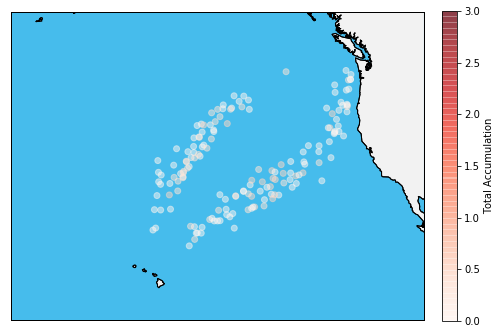

In [42]:
fig, ax = plt.subplots(figsize=(8,12))
m = Basemap(resolution='l', # c, l, i, h, f or None
            projection='merc',
            lat_0=33.5, lon_0=-146.5,
            llcrnrlon=-179, llcrnrlat=14 , urcrnrlon=-114, urcrnrlat=53)
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines();

#trash data
lat = data['Y'].values
lon = data['X'].values
accumulation = data['Debris Levels'].values

#scatter plot trash data
m.scatter(lon, lat, latlon=True,
          c=np.log10(accumulation),
          cmap='Reds', alpha=0.5);

plt.colorbar(fraction=0.0347, pad=0.04,label=r'Total Accumulation')
plt.clim(0, 3);